# 1. Importamos bibliotecas necesarias 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargamos y Exploramos el Conjunto de Datos

In [3]:
df= pd.read_csv('analisis.csv')
print(df.head())
print(df.info())
print(df.describe())

           usuario         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float

# 3. Procesamiento de Datos
## a. Selección de Características

> Seleccionaremos las características realacionadas con la personalidad y el conteo de palabras. Excluiremos columnas como USUARIO y CATEGORÍA para el Clustering

In [5]:
features= ['op', 'co', 'ex', 'ag', 'ne', 'wordcount']
X= df[features]

## b. Manejo de Valores Faltantes
> Verificamos si hay valores faltantes y decidimos cómo manejarlos

In [6]:
print(X.isnull().sum())

op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
dtype: int64


Si tuvieramos valores faltantes, podríamos por ejemplo eliminarlos:

X=X.dropna()

## c. Estandarización de Características
K-Means es sensible a la escala de las variables, por lo que es recomendable estandarizar los daos.

In [8]:
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# 4. Determinación del Número Óptimo de Clusters
Utilizaremos el método del codo para determinar el número óptimo de clusters

c:\Users\facun\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\facun\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


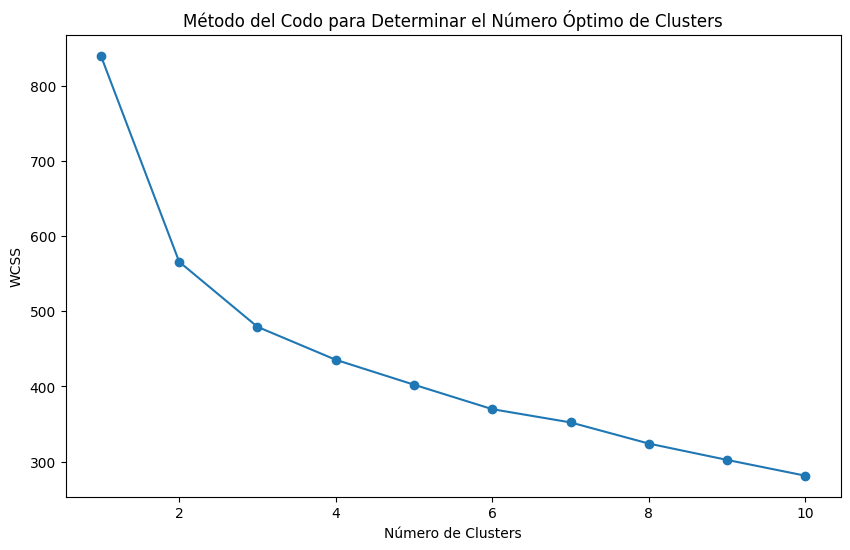

In [9]:
wcss= []

for i in range (1, 11):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

Encontramos el codo para entre 3 a 4 clusters, por lo que tomamos 3
# 5. Apliocar K-Means con el número Óptimo de Clusters

In [13]:
k=3
kmeans= KMeans(n_clusters=k, init= 'k-means++', random_state=42)
clusters= kmeans.fit_predict(X_scaled)

df['Cluster']= clusters

# 6. Visualización de los Clusters
POdemos visualizar los clusters utilizando técnicas de reducción de dimensionalidad como PCA

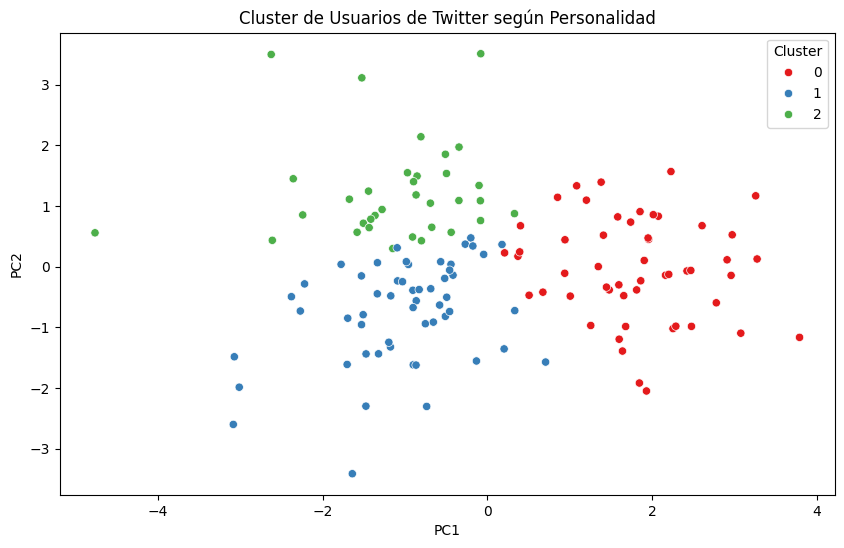

In [14]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
principal_components= pca.fit_transform(X_scaled)
df['PC1']= principal_components[:, 0]
df['PC2']= principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Cluster de Usuarios de Twitter según Personalidad')
plt.show()

# 7. Análisis de los Clusters
## a. Perfil de cada Cluster
Podemos analizar las características promedio de cada cluster para entender sus perfiles de personalidad.

In [15]:
cluster_profile= df.groupby('Cluster')[features].mean()
print(cluster_profile)

                op         co         ex         ag         ne   wordcount
Cluster                                                                   
0        37.205537  19.617885  46.559076  30.411468   7.452625   65.306831
1        51.929124  23.220302  37.612471  17.471167   6.842859  102.043652
2        43.505356  27.728607  36.908073  20.110427  10.675378  144.525156


## b. Comparación con Categoría Laboral
Verificamos si los Clusters tienen alguna relación con la categoría laboral.

categoria   1   2  3   4  5  6   7   8  9
Cluster                                  
0           5   7  0  13  3  4  10   6  4
1          15  23  8   4  1  0   2   0  1
2           7   4  1   2  0  4   5  10  1


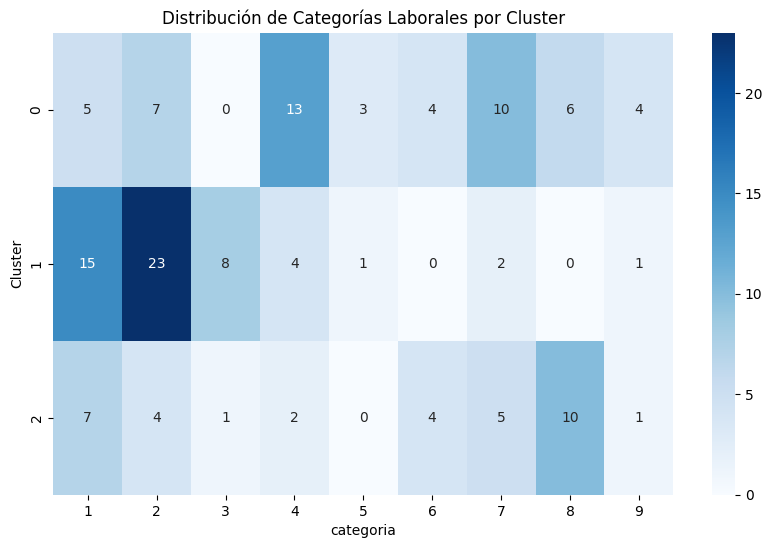

In [17]:
contingencia= pd.crosstab(df['Cluster'], df['categoria'])
print(contingencia)

plt.figure(figsize=(10, 6))
sns.heatmap(contingencia, annot=True, fmt='d', cmap='Blues')
plt.title('Distribución de Categorías Laborales por Cluster')
plt.show()

**SPOILER_ALERT:** Si los clusters muestran una distribución uniforme de las categorías, podríamos concluir que la personalidad no está fuertemente relacionada con la actividad laboral. Por el contrario, si ciertos clusters predominan en categorías específicas, podría respaldar nuestra hipótesis inicial.

# 8. Conclusiones
Tras realizar el análisis, se puede concluir en lo siguiente:

- Cluster 0:

> Este grupo tiene una distribución bastante homogénea entre diferentes categorías, con un pico en la categoría 4, que parece ser la más predominante con 13 personas. Otras categorías como la 1, 2, 6, y 8 también tienen representación importante.

- Cluster 1:

> Este cluster tiene una concentración significativa en las categorías 1 y 2, con 15 y 23 individuos respectivamente, lo que podría indicar que los usuarios de estas categorías comparten similitudes notables en cuanto a rasgos de personalidad.

- Cluster 2:

> En este cluster, la categoría 8 tiene una mayor representación con 10 personas. Las categorías 1 y 7 también tienen una presencia relevante.

Parece que Cluster 1 está fuertemente asociado con las categorías laborales 1 y 2, lo que sugiere que estas dos categorías podrían tener características de personalidad similares.
En cambio, Cluster 0 y Cluster 2 parecen más heterogéneos en cuanto a la distribución de las categorías, aunque hay algunas agrupaciones notables (como la concentración en la categoría 4 para el Cluster 0 y en la categoría 8 para el Cluster 2).

Este análisis sugiere que, si bien algunos clusters muestran cierta relación con la categoría laboral (Cluster 1), la personalidad de los usuarios no está completamente alineada con la actividad laboral en todos los casos.